In [159]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import gradio as gr
from warnings import filterwarnings
filterwarnings('ignore')

In [61]:
file_path = r"C:\Users\ASUS\Downloads\diabetes_dataset.csv"
df = pd.read_csv(file_path)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose              

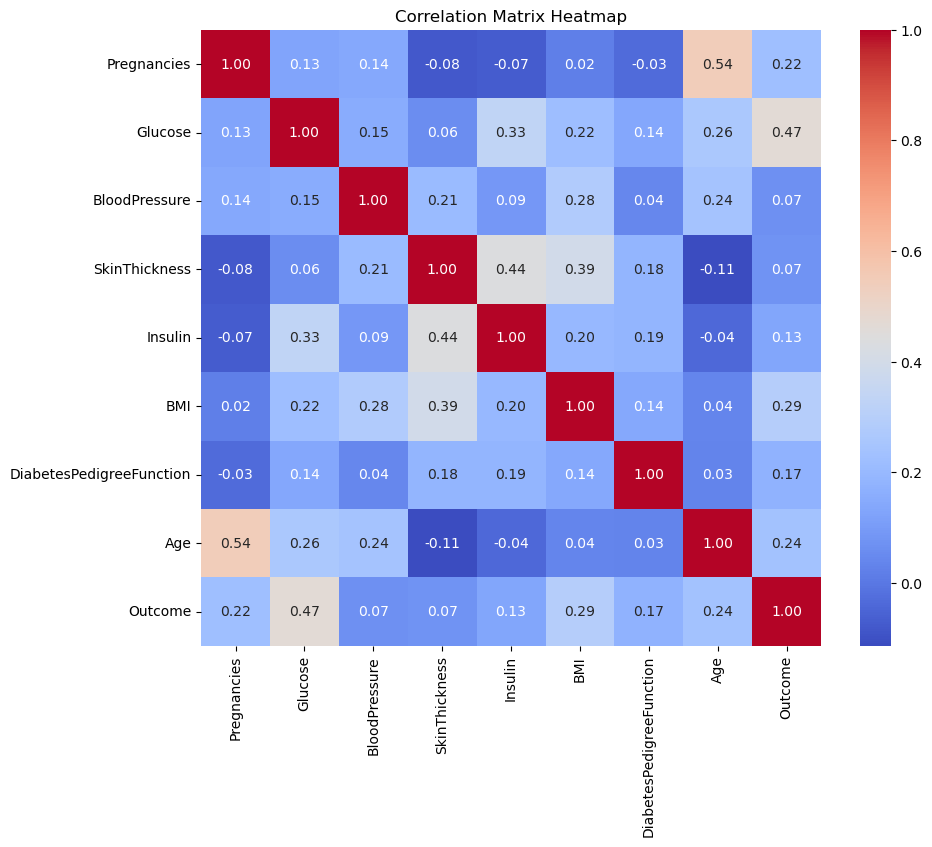

In [17]:
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

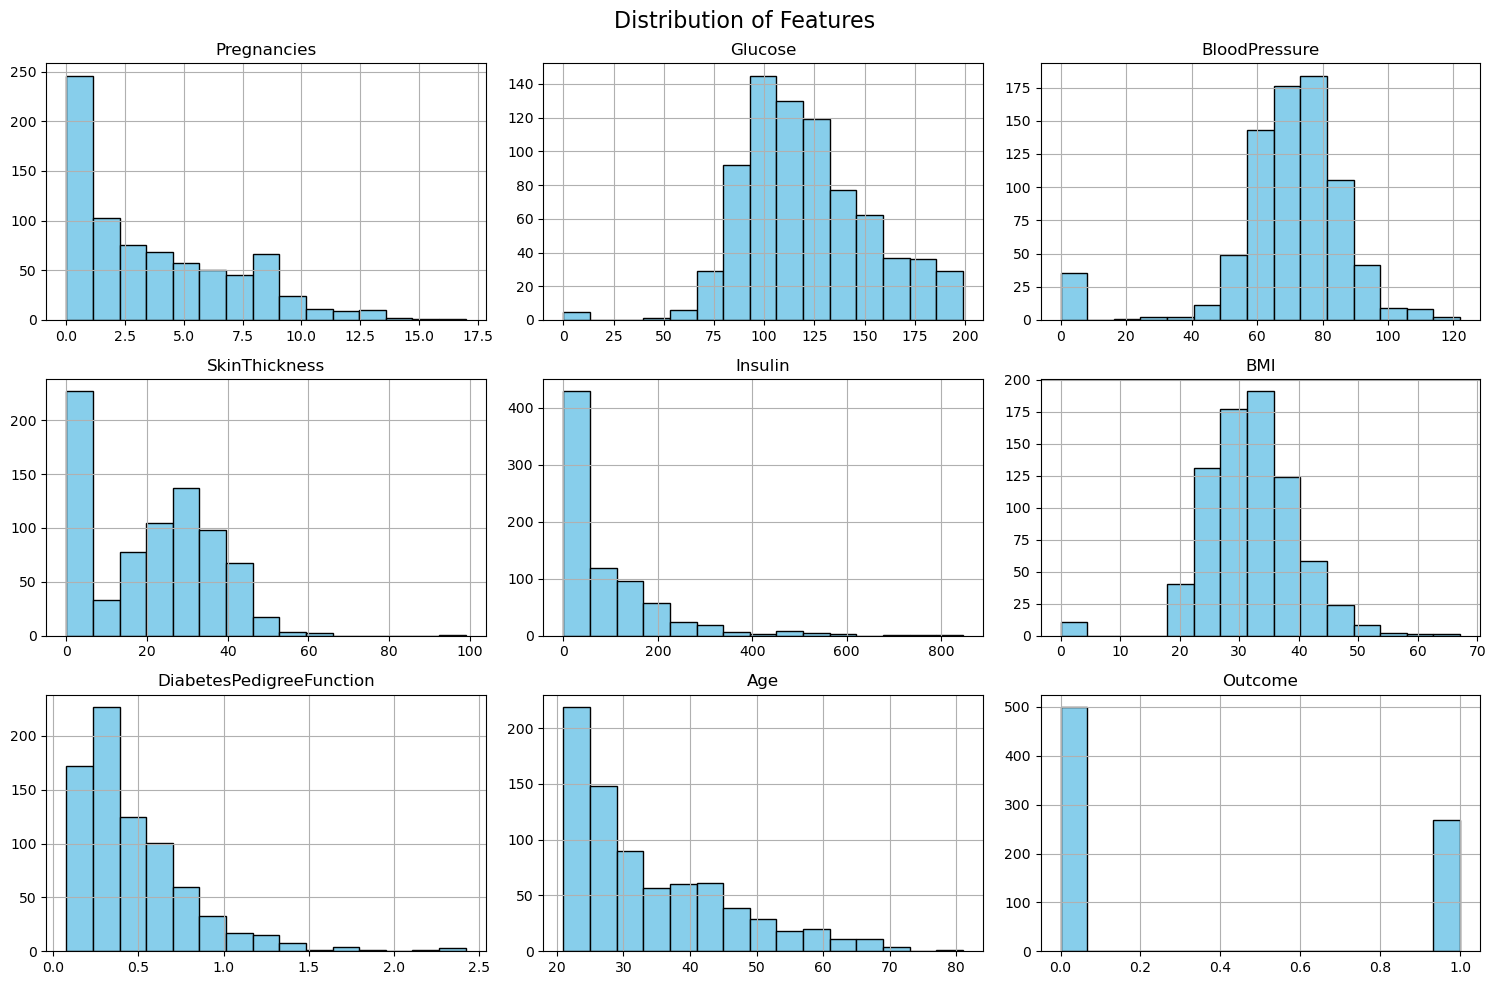

In [19]:
# 1. Histograms for feature distributions
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Features', fontsize=16)
plt.tight_layout()
plt.show()

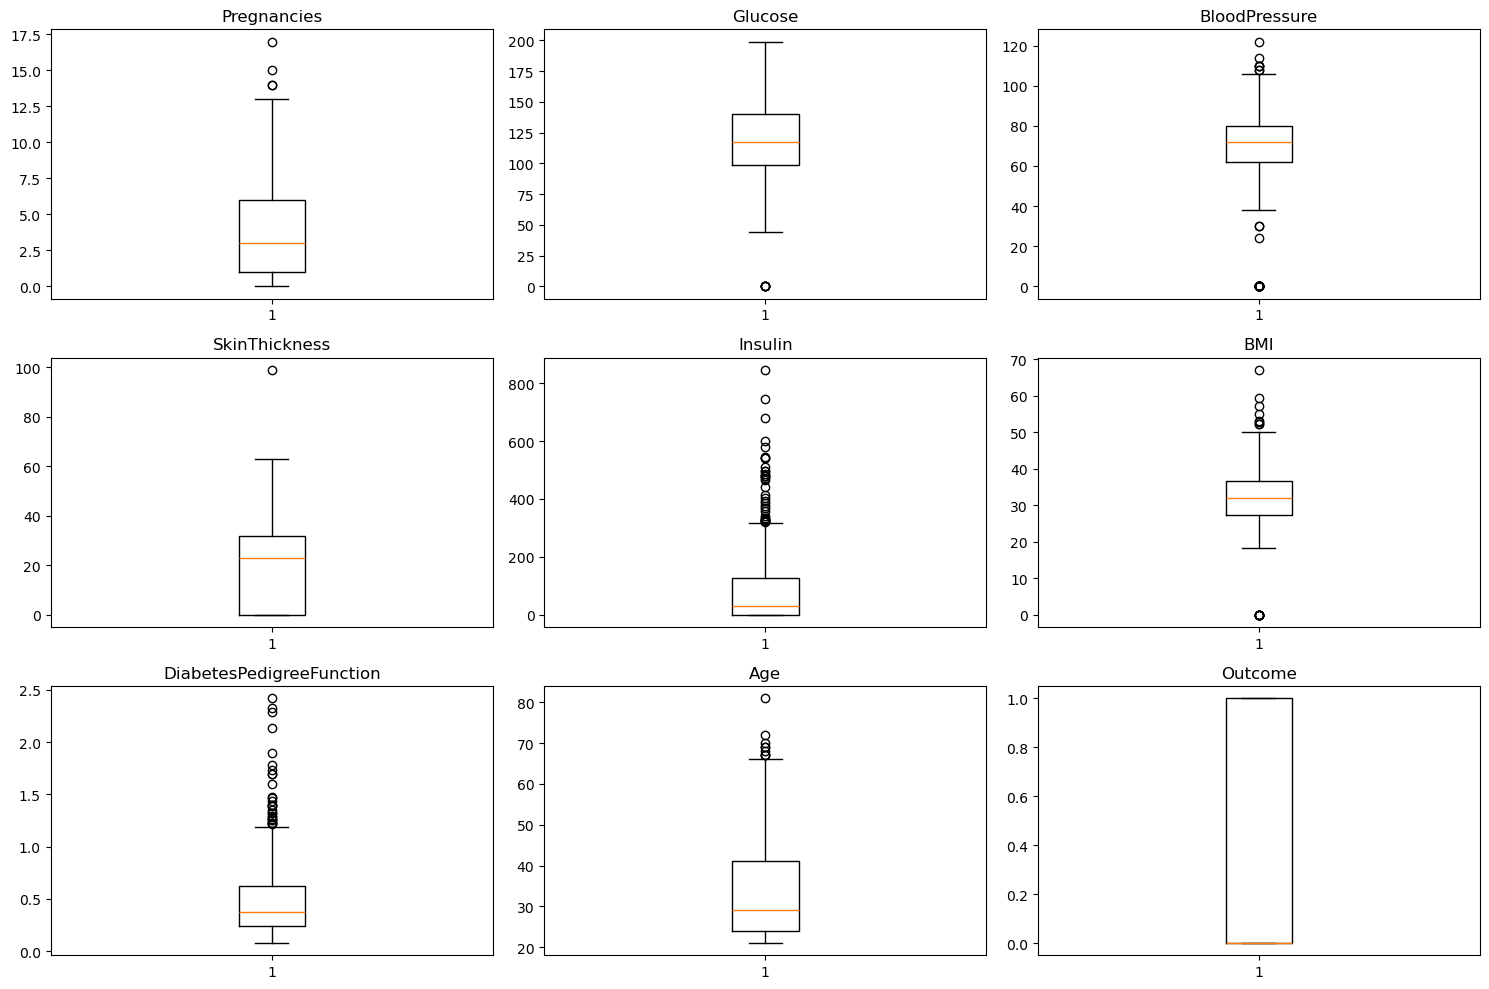

In [149]:
def draw_boxplots(df):
    plt.figure(figsize=(15, 10))  # Set graph dimension
    for i, col in enumerate(df.columns, 1):
        plt.subplot(3, 3, i)  # 3x3 grid
        plt.boxplot(df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

draw_boxplots(df) # As we see, there are outlier values

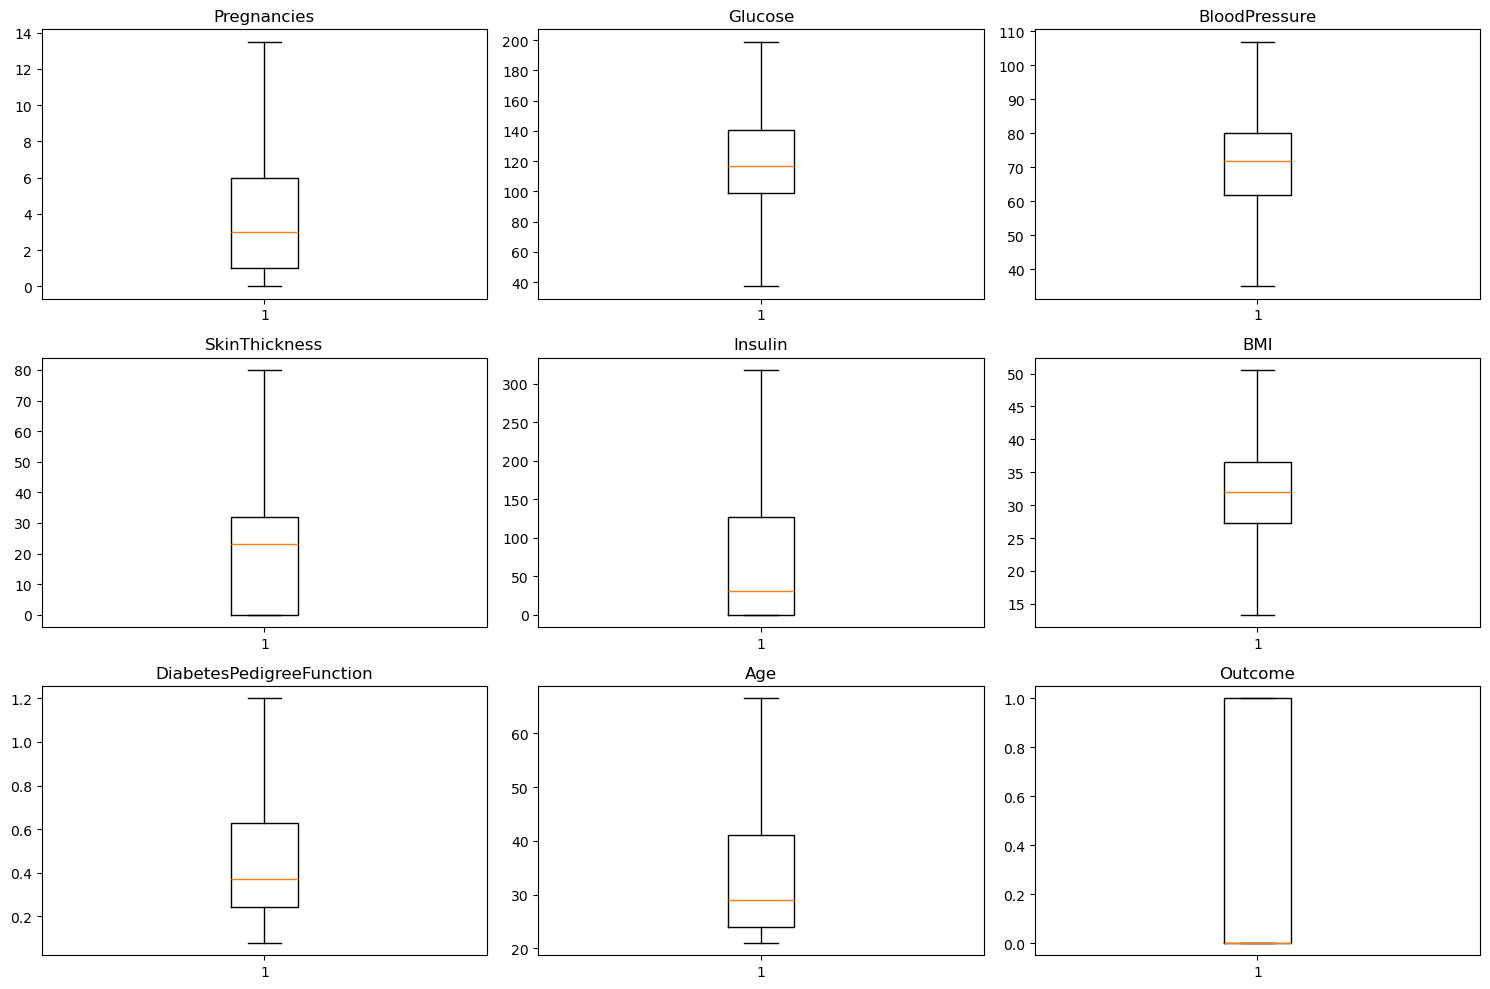

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0             72             35      0.0  33.6   
1            1.0     85.0             66             29      0.0  26.6   
2            8.0    183.0             64              0      0.0  23.3   
3            1.0     89.0             66             23     94.0  28.1   
4            0.0    137.0             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0             76             48    180.0  32.9   
764          2.0    122.0             70             27      0.0  36.8   
765          5.0    121.0             72             23    112.0  26.2   
766          1.0    126.0             60              0      0.0  30.1   
767          1.0     93.0             70             31      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  
1                

In [187]:

def BoxPlotMethod(col_name, df):
    df_variable = df[col_name]
    Q1 = df_variable.quantile(0.25)
    Q3 = df_variable.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Identify and cap outliers
    low_outlier_df = (df_variable < lower_limit)
    up_outlier_df = (df_variable > upper_limit)
    df_variable[low_outlier_df] = lower_limit
    df_variable[up_outlier_df] = upper_limit

# Create a grid of box plots
plt.figure(figsize=(15, 10))  # Set graph dimension
col_list = df.columns.tolist()  # Get the list of columns

# Loop through each column and create subplots
for idx, col in enumerate(col_list):
    plt.subplot(3, 3, idx + 1)  # 3x3 grid, idx + 1 to start at 1
    BoxPlotMethod(col, df)  # Cap the outliers
    plt.boxplot(df[col])  # Create the boxplot
    plt.title(col)  # Title for each subplot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

# Display the cleaned DataFrame
print(df)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.7769292283086766
Test Set Accuracy: 0.7597402597402597
Precision: 0.6551724137931034
Recall: 0.6909090909090909
ROC AUC Score: 0.8128558310376492
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



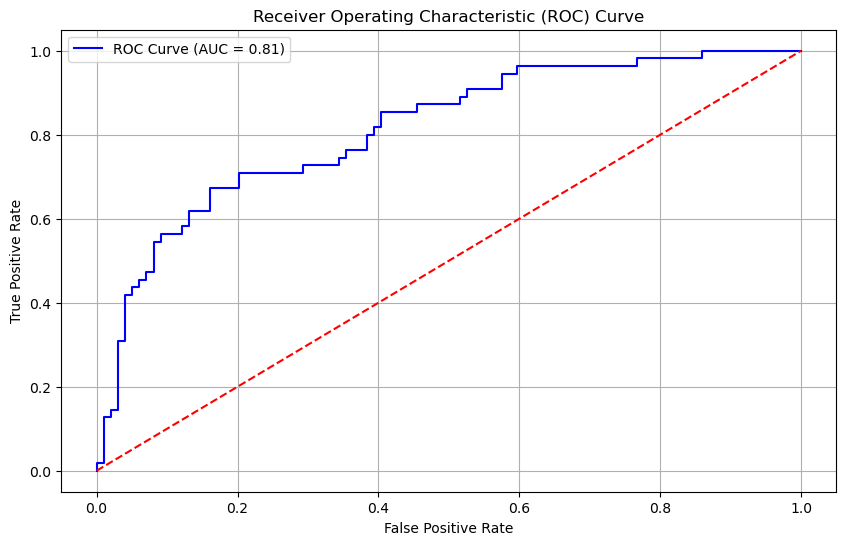

In [205]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you have your DataFrame 'df' ready
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
gb_model = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Train the model with the best parameters
best_gb_model = GradientBoostingClassifier(**best_params, random_state=42)
best_gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_gb_model.predict(X_test)
y_pred_proba = best_gb_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Test Set Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC Score:", roc_auc)

# Print classification report
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In [207]:
# Function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    input_data = pd.DataFrame({
        "Pregnancies": [Pregnancies],
        "Glucose": [Glucose],
        "BloodPressure": [BloodPressure],
        "SkinThickness": [SkinThickness],
        "Insulin": [Insulin],
        "BMI": [BMI],
        "DiabetesPedigreeFunction": [DiabetesPedigreeFunction],
        "Age": [Age]
    })
    
    prediction = best_gb_model.predict(input_data)[0]
    probability = best_gb_model.predict_proba(input_data)[:, 1][0]  # Probability of the positive class
    
    return {
        "Prediction": "Diabetic" if prediction == 1 else "Non-Diabetic",
        "Probability": round(probability, 4)
    }

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Number(label="Pregnancies", value=0),
        gr.Number(label="Glucose", value=120),
        gr.Number(label="BloodPressure", value=70),
        gr.Number(label="SkinThickness", value=20),
        gr.Number(label="Insulin", value=85),
        gr.Number(label="BMI", value=25.0),
        gr.Number(label="DiabetesPedigreeFunction", value=0.5),
        gr.Number(label="Age", value=30)
    ],
    outputs=gr.JSON(),
    title="Diabetes Prediction",
    description="Provide input parameters to predict the likelihood of diabetes."
)

# Launch the Gradio interface
interface.launch()

* Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.
